<b>Fractional Brownian Motion (fBM)</b> <br><br>
<i>implementation from https://github.com/732jhy/Fractional-Brownian-Motion/blob/master/Cholesky.py </i>

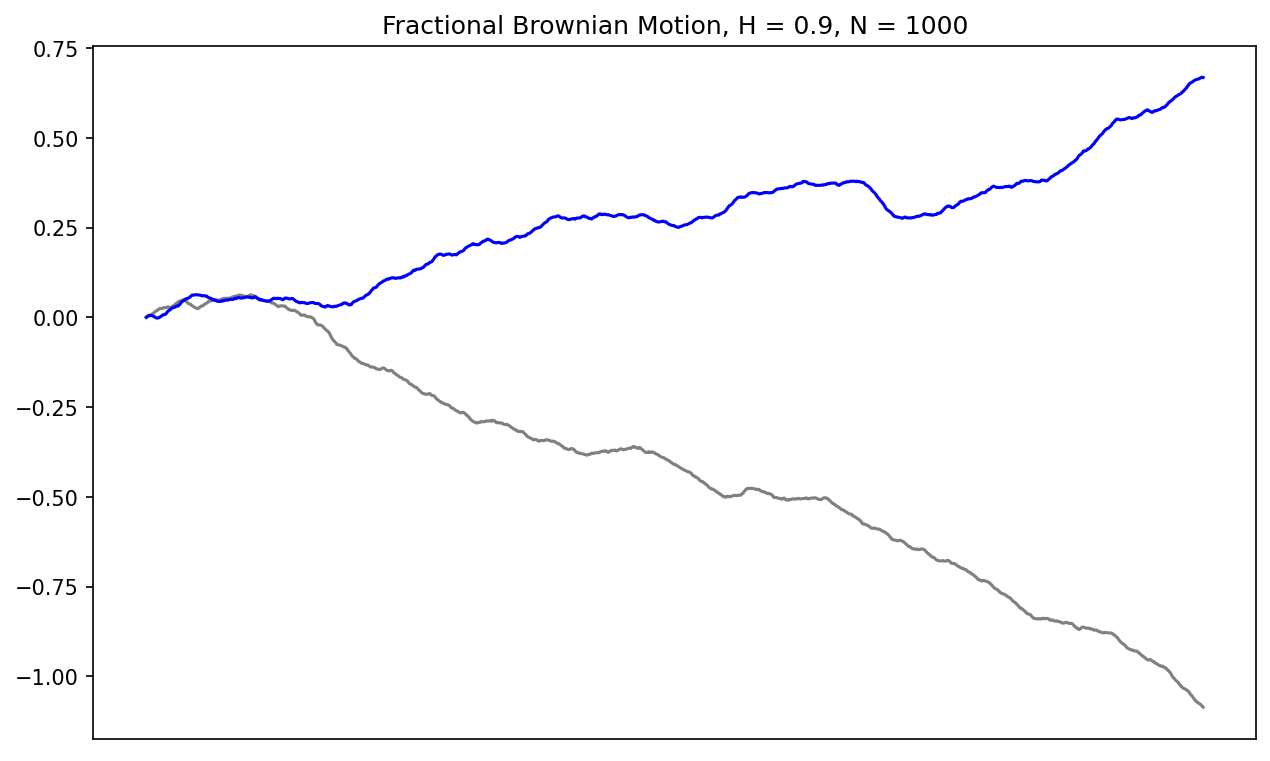

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 15 18:46:02 2020

@author: Justin Yu

Implementation of Fractional Brownian Motion, Cholesky's Method
"""
import numpy as np


def cholesky_fbm(T, N, H):
    '''
    Generates sample paths of fractional Brownian Motion using the Davies Harte method
    
    args:
        T:      length of time (in years)
        N:      number of time steps within timeframe
        H:      Hurst parameter
    '''
    gamma = lambda k,H: 0.5*(np.abs(k-1)**(2*H) - 2*np.abs(k)**(2*H) + np.abs(k+1)**(2*H))  
    
    L = np.zeros((N,N))
    X = np.zeros(N)
    V = np.random.standard_normal(size=N)

    L[0,0] = 1.0
    X[0] = V[0]
    
    L[1,0] = gamma(1,H)
    L[1,1] = np.sqrt(1 - (L[1,0]**2))
    X[1] = np.sum(L[1,0:2] @ V[0:2])
    
    for i in range(2,N):
        L[i,0] = gamma(i,H)
        
        for j in range(1, i):         
            L[i,j] = (1/L[j,j])*(gamma(i-j,H) - (L[i,0:j] @ L[j,0:j]))

        L[i,i] = np.sqrt(1 - np.sum((L[i,0:i]**2))) 
        X[i] = L[i,0:i+1] @ V[0:i+1]

    fBm = np.cumsum(X)*(N**(-H))
    return (T**H)*(fBm)



#test
import matplotlib.pyplot as plt
#simulate
T = 1
N = 1000
H = 0.9
fBm1 = cholesky_fbm(T, N, H)
fBm2 = cholesky_fbm(T, N, H)

#plot
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(fBm1, color = 'grey')
plt.plot(fBm2, color = 'blue')

plt.title('Fractional Brownian Motion, H = 0.9, N = 1000')
plt.xticks([])
plt.show()
